In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
stocks = pd.read_csv('STOCK_VAL.csv')

In [4]:
stocks['DATE'] = pd.to_datetime(stocks['DATE'], format='%d-%m-%Y')
stocks = stocks.set_index('DATE').sort_index()

<AxesSubplot:xlabel='DATE'>

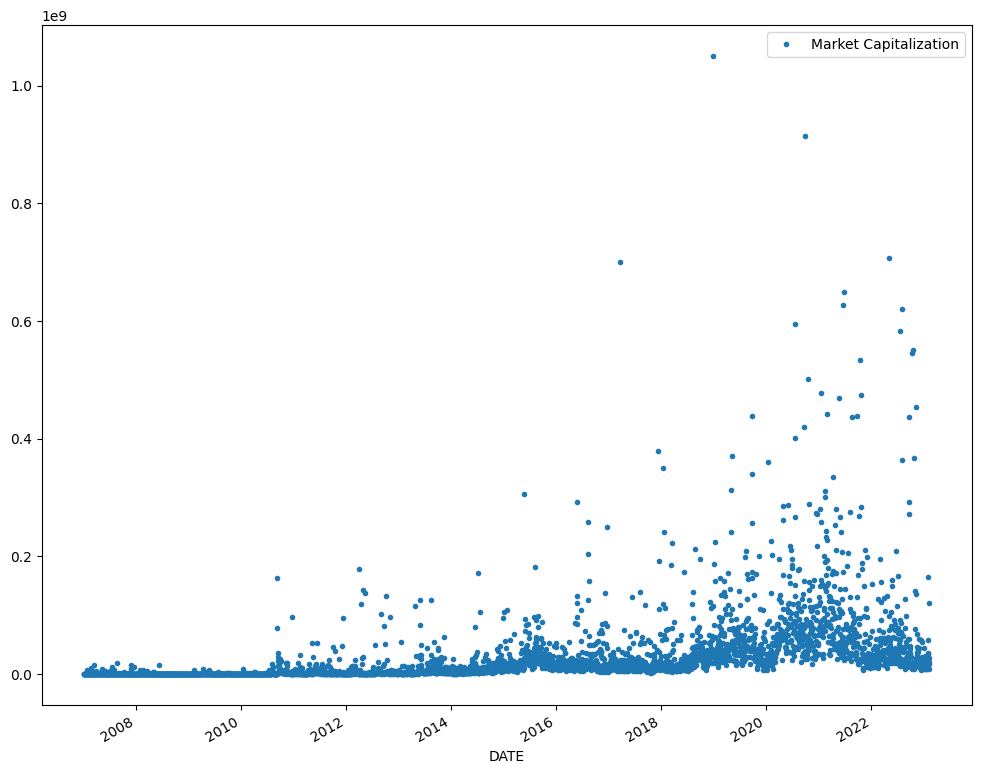

In [5]:
plt.rcParams['figure.figsize'] = [12,10]
plt.rcParams['figure.figsize'] = [12,10]
stocks.plot(y= 'Market Capitalization', style='.')

In [6]:
stocks['year'] = stocks.index.year
stocks.groupby('year').diff()

,OPEN,HIGH,LOW,CLOSE,NO. OF SHARES,NO. OF TRADES,Market Capitalization
DATE,,,,,,,
2007-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-03,-1.80,-0.60,-0.30,-0.21,129.0,11.0,1.377420e+04
2007-01-04,-0.20,0.40,-0.20,0.62,1860.0,29.0,2.054579e+05
2007-01-05,0.68,0.20,1.00,-0.03,-1986.0,-27.0,-2.186466e+05
2007-01-08,-1.18,1.80,-0.94,-0.06,381.0,-12.0,4.289042e+04
...,...,...,...,...,...,...,...
2023-02-03,87.95,59.80,199.80,49.10,-10582.0,-2980.0,-4.404805e+07
2023-02-06,12.00,-22.35,30.50,1.80,-21719.0,-2888.0,-1.001926e+08
2023-02-07,28.00,27.40,-6.05,-21.25,1477.0,359.0,6.884686e+06


In [7]:
BY_YEAR= stocks.groupby('year').mean()

In [8]:
stocks.loc[stocks['year'] == 2007].iloc[-1]

OPEN                        155.00
HIGH                        155.00
LOW                         147.00
CLOSE                       147.53
NO. OF SHARES              5310.00
NO. OF TRADES               274.00
Market Capitalization    801810.00
year                       2007.00
Name: 2007-12-31 00:00:00, dtype: float64

C:\Users\siddh\AppData\Local\Temp\ipykernel_24120\2604145649.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stocks['lag_no_shares{}'.format(i)] = stocks['NO. OF SHARES'].shift(i)
C:\Users\siddh\AppData\Local\Temp\ipykernel_24120\2604145649.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  stocks['lag_no_shares{}'.format(i)] = stocks['NO. OF SHARES'].shift(i)
C:\Users\siddh\AppData\Local\Temp\ipykernel_24120\2604145649.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.i

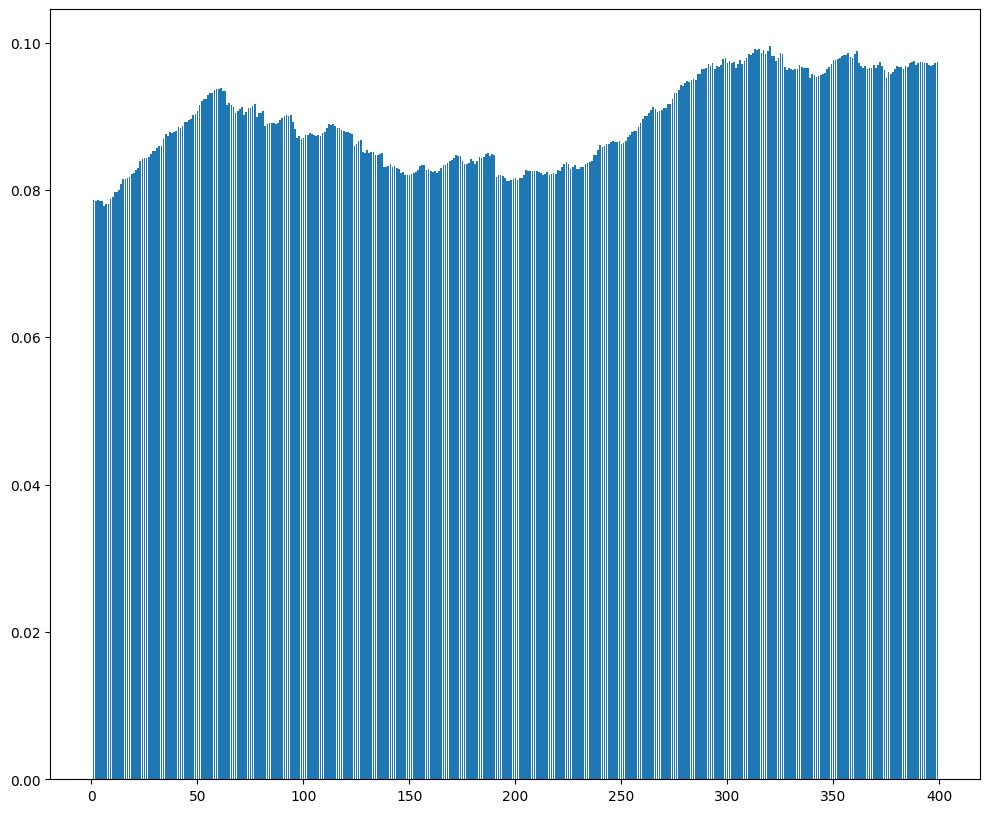

In [9]:
def plot_auto_corr(number, target):
    for i in range(1,number):
        stocks['lag_no_shares{}'.format(i)] = stocks['NO. OF SHARES'].shift(i)

    plt.bar(x = [i for i in range(1,number)], height = [stocks[[target,'lag_no_shares{}'.format(i)]].corr()['lag_no_shares{}'.format(i)][0] for i in range(1,number)])

plot_auto_corr(400, 'OPEN')

In [10]:
stocks[['OPEN','NO. OF SHARES']].corr()

,OPEN,NO. OF SHARES
OPEN,1.000000,0.077522
NO. OF SHARES,0.077522,1.000000


<AxesSubplot:xlabel='DATE', ylabel='CLOSE'>

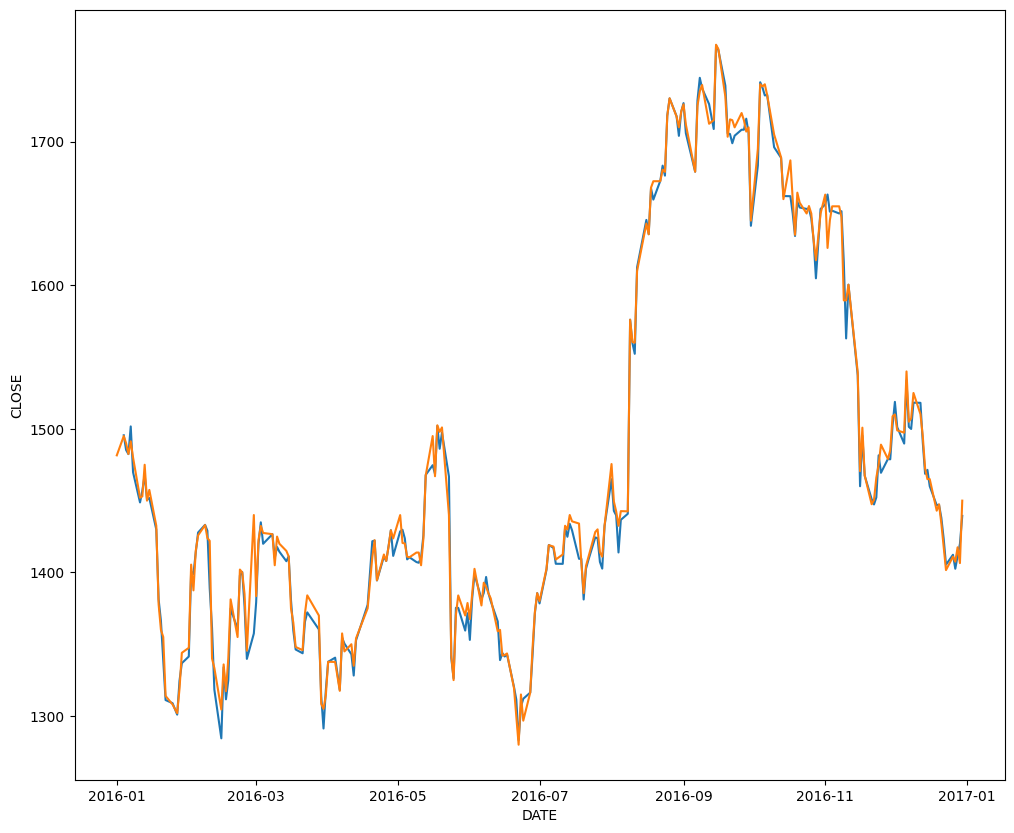

In [11]:
interest = stocks.loc[stocks['year'] == 2016]
sns.lineplot(x = interest.index,y = interest['CLOSE'].shift(1))
sns.lineplot(x = interest.index,y = interest['OPEN'])

In [12]:
inc = pd.read_csv('INC_ST.csv')

In [13]:
inc = inc.set_index(inc.columns[0])

In [14]:
inc = inc.replace('--',0)

In [15]:
inc.drop(columns=[inc.columns[-1]], axis=1, inplace=True)

In [16]:
inc.iloc[0][:"MAR '06"].to_list()

['13371.62',
 '12113.65',
 '10820.57',
 '10389.49',
 '9205.93',
 '8311.53',
 '7651.64',
 '7100.46',
 '6232.09',
 '5564.38',
 '4947.04',
 '4219.97',
 '3416.6',
 '3127.11',
 '2584.8',
 '2199.3',
 '1713.3']

Text(0.5, 1.0, 'Income of Britannia Industries')

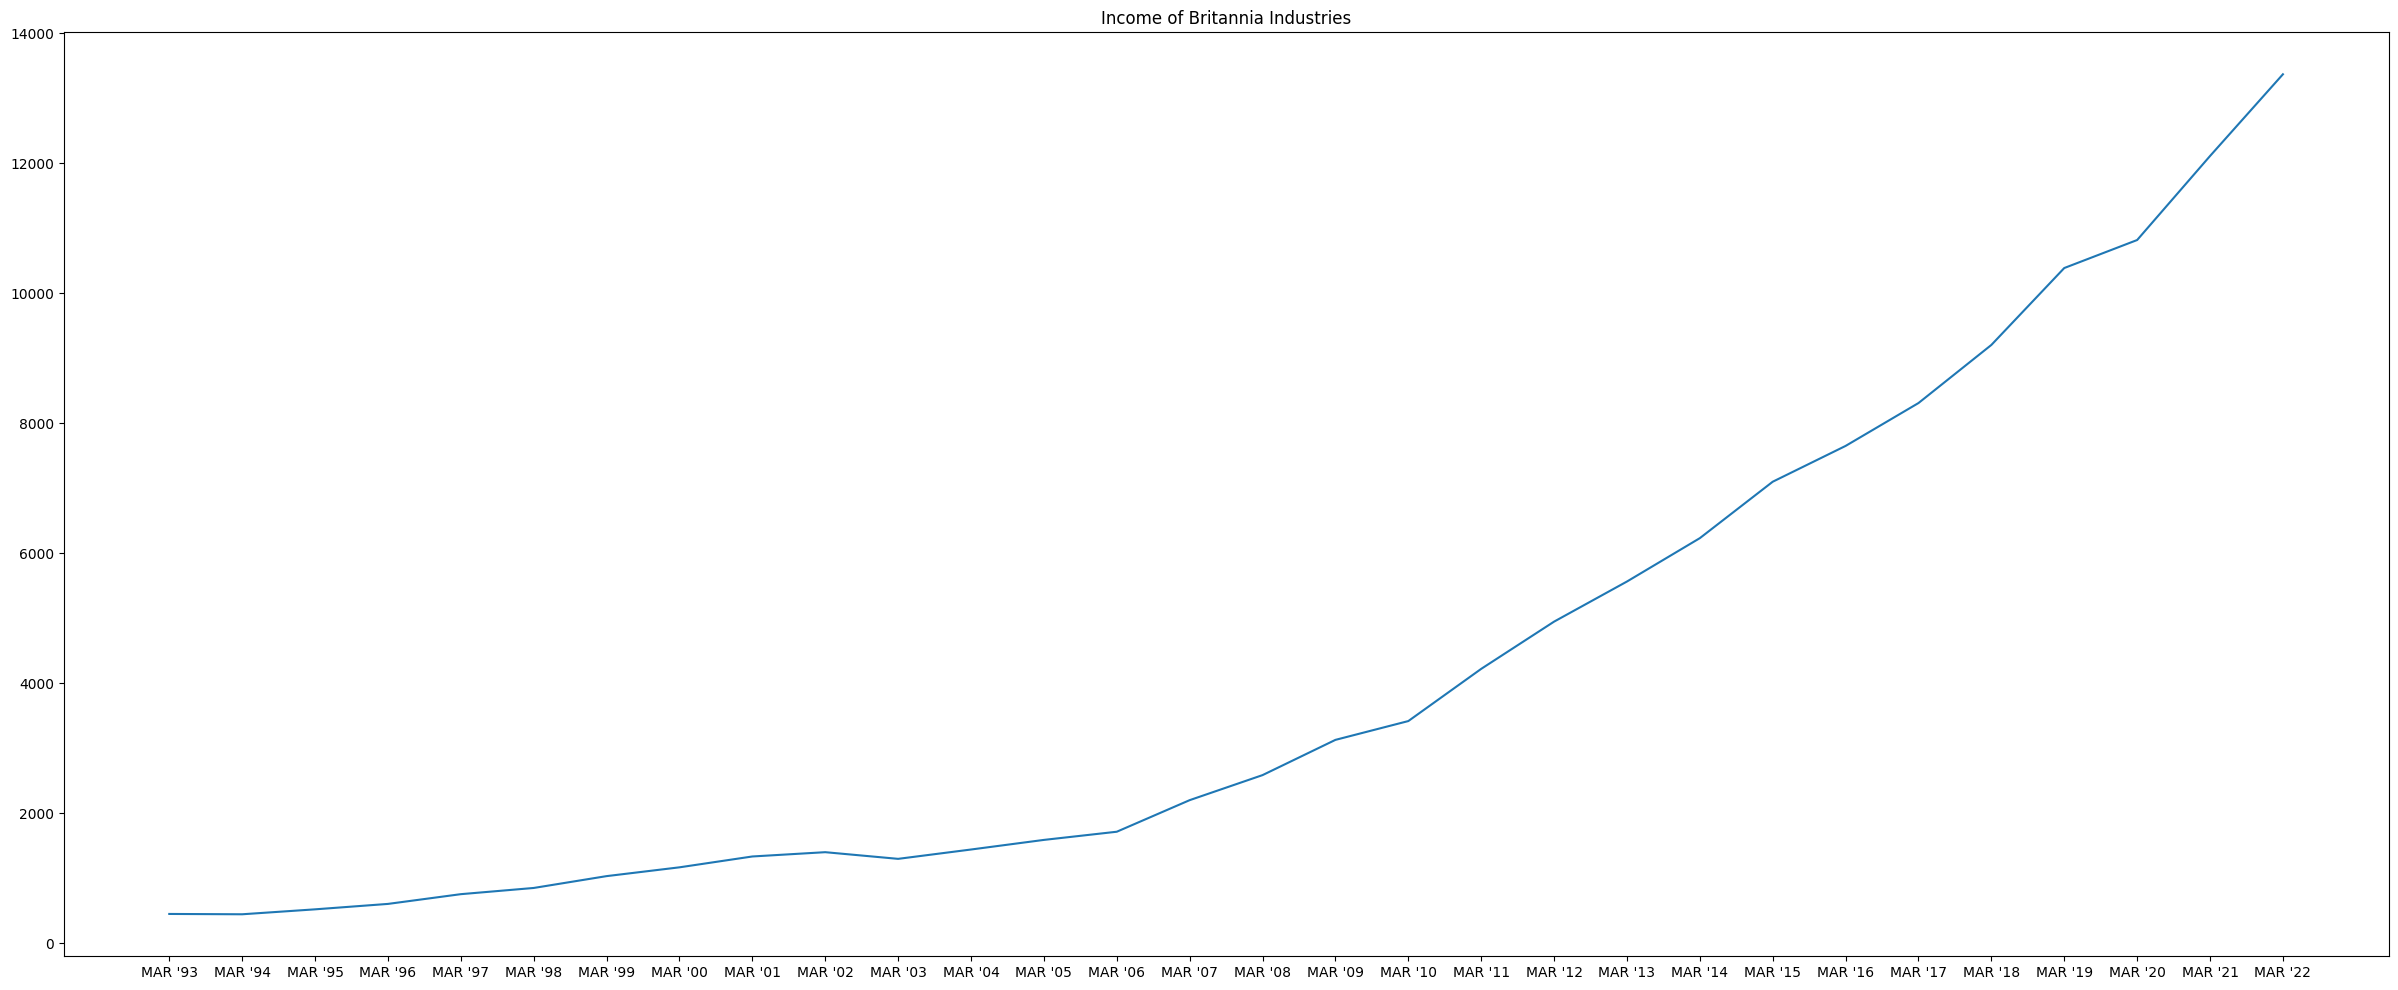

In [17]:
plt.rcParams['figure.figsize']= [30,12]
plt.plot(inc.iloc[0][::-1].astype(float))
plt.title("Income of Britannia Industries")

In [18]:
BY_YEAR['income_prev_year'] = inc.iloc[0][:"MAR '06"].astype('float').to_list()[::-1]

In [19]:
BY_YEAR.corr()

,OPEN,HIGH,LOW,CLOSE,NO. OF SHARES,NO. OF TRADES,Market Capitalization,income_prev_year
OPEN,1.000000,0.999998,0.999994,0.999997,0.205505,0.683292,0.833485,0.973328
HIGH,0.999998,1.000000,0.999988,0.999995,0.205658,0.683858,0.833524,0.973416
LOW,0.999994,0.999988,1.000000,0.999998,0.204212,0.682264,0.832351,0.973456
CLOSE,0.999997,0.999995,0.999998,1.000000,0.204397,0.682662,0.832482,0.973484
NO. OF SHARES,0.205505,0.205658,0.204212,0.204397,1.000000,0.615210,0.525306,0.300520
NO. OF TRADES,0.683292,0.683858,0.682264,0.682662,0.615210,1.000000,0.834968,0.736982
Market Capitalization,0.833485,0.833524,0.832351,0.832482,0.525306,0.834968,1.000000,0.796579
income_prev_year,0.973328,0.973416,0.973456,0.973484,0.300520,0.736982,0.796579,1.000000


In [20]:
inflation = pd.read_csv('INF_RATE.csv')

In [21]:
#inflation = inflation.set_index('Year')
BY_YEAR['inflation_prev_year'] = inflation['India'].str.replace('%','').astype('float')[:17][::-1].to_list()

In [22]:
BY_YEAR.corr()

,OPEN,HIGH,LOW,CLOSE,NO. OF SHARES,NO. OF TRADES,Market Capitalization,income_prev_year,inflation_prev_year
OPEN,1.000000,0.999998,0.999994,0.999997,0.205505,0.683292,0.833485,0.973328,-0.632318
HIGH,0.999998,1.000000,0.999988,0.999995,0.205658,0.683858,0.833524,0.973416,-0.632498
LOW,0.999994,0.999988,1.000000,0.999998,0.204212,0.682264,0.832351,0.973456,-0.630922
CLOSE,0.999997,0.999995,0.999998,1.000000,0.204397,0.682662,0.832482,0.973484,-0.631494
NO. OF SHARES,0.205505,0.205658,0.204212,0.204397,1.000000,0.615210,0.525306,0.300520,0.058243
NO. OF TRADES,0.683292,0.683858,0.682264,0.682662,0.615210,1.000000,0.834968,0.736982,-0.367221
Market Capitalization,0.833485,0.833524,0.832351,0.832482,0.525306,0.834968,1.000000,0.796579,-0.574653
income_prev_year,0.973328,0.973416,0.973456,0.973484,0.300520,0.736982,0.796579,1.000000,-0.528876
inflation_prev_year,-0.632318,-0.632498,-0.630922,-0.631494,0.058243,-0.367221,-0.574653,-0.528876,1.000000


In [23]:
GDP = pd.read_csv('GDP.csv')

In [24]:
GDP = GDP.set_index('Year').sort_index()

In [25]:
BY_YEAR['pcg_prev_year'] = GDP['GDP Per Capita (US $)'].str.replace("$","").str.replace(',','').astype('float')[[2006+i for i in range(0,17)]].to_list()

C:\Users\siddh\AppData\Local\Temp\ipykernel_24120\3038893959.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  BY_YEAR['pcg_prev_year'] = GDP['GDP Per Capita (US $)'].str.replace("$","").str.replace(',','').astype('float')[[2006+i for i in range(0,17)]].to_list()


In [26]:
BY_YEAR['gdp_growth_prev_year'] = GDP['Annual Growth Rate (%)'].str.replace('%','').astype('float')[13:].to_list()

In [27]:
BY_YEAR['net_profit'] = inc.iloc[27][:"MAR '06"].astype("float").to_list()[::-1]

<AxesSubplot:>

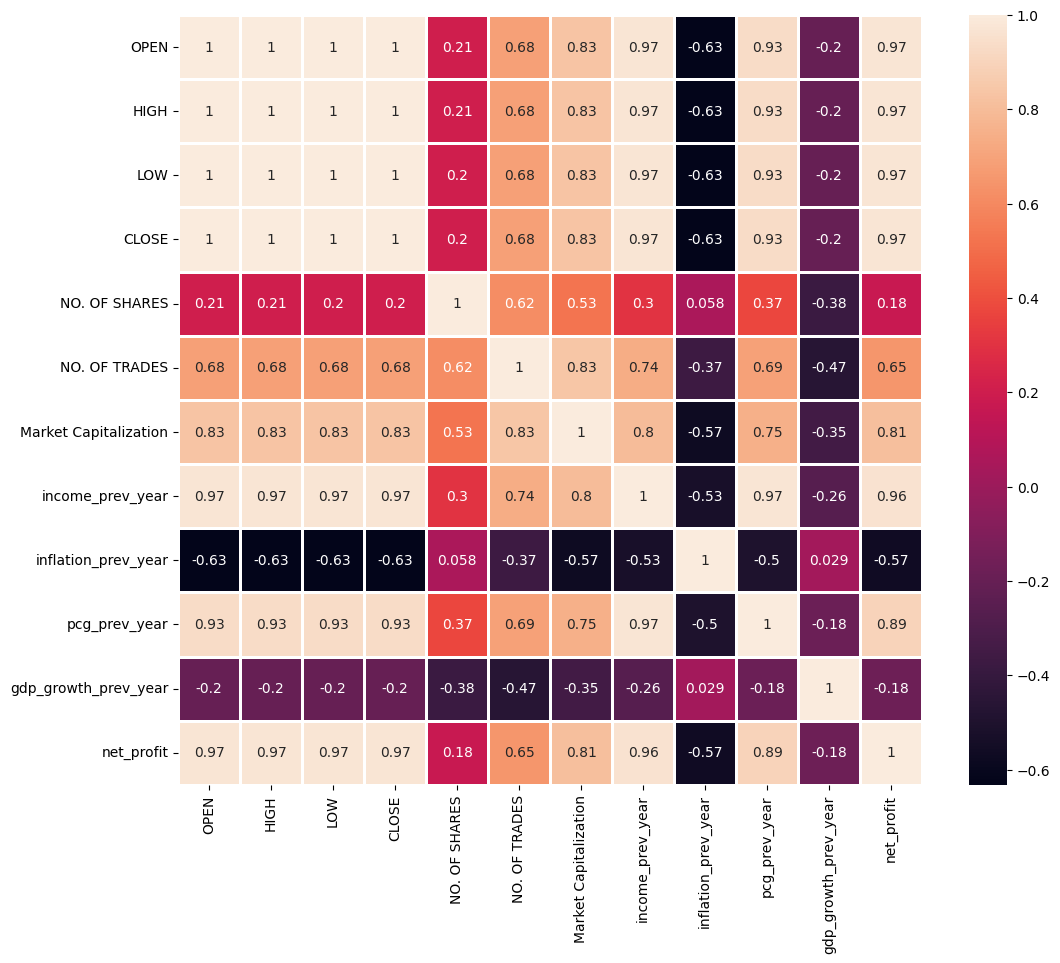

In [28]:
plt.rcParams['figure.figsize'] = [12,10]
sns.heatmap(BY_YEAR.corr(), linewidths=2, annot=True)

In [29]:
pd.concat([BY_YEAR['income_prev_year'],BY_YEAR['income_prev_year'].shift(1)], axis=1).corr()

,income_prev_year,income_prev_year
income_prev_year,1.000000,0.998005
income_prev_year,0.998005,1.000000


Text(0, 0.5, 'Value')

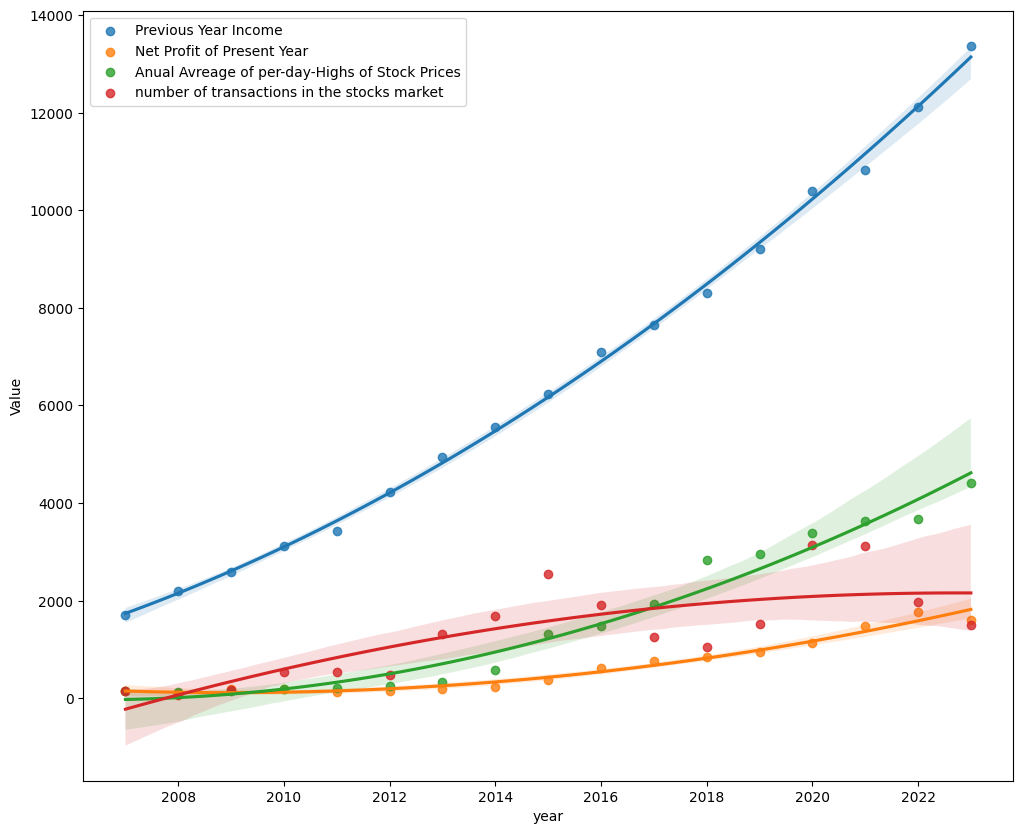

In [30]:
sns.regplot(x=BY_YEAR.index,y=BY_YEAR['income_prev_year'], order=2, label='Previous Year Income')
sns.regplot(x=BY_YEAR.index,y=BY_YEAR['net_profit'], order=2, label='Net Profit of Present Year')
sns.regplot(x=BY_YEAR.index,y=(BY_YEAR['HIGH']+BY_YEAR['LOW'])/2, order=2, label='Anual Avreage of per-day-Highs of Stock Prices')
sns.regplot(x=BY_YEAR.index,y=BY_YEAR['NO. OF TRADES'], order=2, label='number of transactions in the stocks market')
plt.legend()
plt.ylabel('Value')

In [31]:
pd.concat([BY_YEAR['HIGH'],BY_YEAR['HIGH'].shift(3)], axis=1).corr()

,HIGH,HIGH
HIGH,1.000000,0.939571
HIGH,0.939571,1.000000


In [32]:
pd.concat([BY_YEAR['NO. OF TRADES'],BY_YEAR['NO. OF TRADES'].shift(1)], axis=1).corr()

,NO. OF TRADES,NO. OF TRADES
NO. OF TRADES,1.000000,0.763934
NO. OF TRADES,0.763934,1.000000


# Factor analysis results
| Target Variable | Factors (of previous year) | Factors of present year |
| --- | --- | --- |
| No. of Trades | Income, Inflation, Per-capita GDP, GDP growth | net profit |
| Incomes | Inflation, Per-Capita-GDP, GDP growth | time (Lineer variation, depends on respective year) |
| Net profit | Income, Inflation, Per-capita GDP, GDP growth | slightly quadratic with time, net_profit |
| Average stocks values | Income, Inflation, Per-capita GDP, GDP growth, No. of Trades | NO. OF TRADES, net_profit |

In [33]:
BY_YEAR.columns

Index(['OPEN', 'HIGH', 'LOW', 'CLOSE', 'NO. OF SHARES', 'NO. OF TRADES',
       'Market Capitalization', 'income_prev_year', 'inflation_prev_year',
       'pcg_prev_year', 'gdp_growth_prev_year', 'net_profit'],
      dtype='object')

In [34]:
# For No. of Trades
X = BY_YEAR[['NO. OF TRADES','income_prev_year', 'inflation_prev_year',
       'pcg_prev_year', 'gdp_growth_prev_year', 'net_profit']]
X['NO. OF TRADES SHIFT'] = X['NO. OF TRADES'].shift(1)
X.reset_index(inplace=True)
X.dropna(inplace=True)
Y = X['NO. OF TRADES']
X.drop('NO. OF TRADES', axis=1, inplace=True)

model_no_trade = Lasso(alpha = 8, tol = 0.0925*5)
model_no_trade.fit(X,Y)


C:\Users\siddh\AppData\Local\Temp\ipykernel_24120\471344868.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['NO. OF TRADES SHIFT'] = X['NO. OF TRADES'].shift(1)
C:\Users\siddh\AppData\Local\Temp\ipykernel_24120\471344868.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)
C:\Users\siddh\AppData\Local\Temp\ipykernel_24120\471344868.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

Lasso(alpha=8, tol=0.4625)

In [35]:
# For income
A = BY_YEAR[['inflation_prev_year',
       'pcg_prev_year', 'gdp_growth_prev_year']]
A.reset_index(inplace=True)
B = BY_YEAR['income_prev_year']
model_inc = Lasso(alpha = 4, tol = 0.0925*5)
model_inc.fit(A, B)


Lasso(alpha=4, tol=0.4625)

In [36]:
#net profit
E = BY_YEAR[['income_prev_year','inflation_prev_year',
       'pcg_prev_year', 'gdp_growth_prev_year', 'net_profit']]
E.reset_index(inplace=True)
E['year^2'] = E['year']*E['year']
E['net_profit_shift'] = E['net_profit'].shift(1)
E.dropna(inplace=True)
F = E['net_profit']
E.drop('net_profit', inplace=True, axis=1)
model_np = Lasso(alpha = 4, tol = 0.0925*5)
model_np.fit(E,F)

C:\Users\siddh\AppData\Local\Temp\ipykernel_24120\168999709.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  E['year^2'] = E['year']*E['year']
C:\Users\siddh\AppData\Local\Temp\ipykernel_24120\168999709.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  E['net_profit_shift'] = E['net_profit'].shift(1)
C:\Users\siddh\AppData\Local\Temp\ipykernel_24120\168999709.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://p

Lasso(alpha=4, tol=0.4625)

In [37]:
#display(E,F)

In [38]:
#average stocks value
P = BY_YEAR[['NO. OF TRADES','income_prev_year', 'inflation_prev_year',
       'pcg_prev_year', 'gdp_growth_prev_year', 'net_profit']]
P['NO. OF TRADES SHIFT'] = P['NO. OF TRADES'].shift(1)
P.reset_index(inplace=True)
P['AVG STOCKS'] = ((BY_YEAR['HIGH']+BY_YEAR['LOW'])/2).to_list()
P['AVG STOCKS SHIFT1'] = P['AVG STOCKS'].shift(1)
P['AVG STOCKS SHIFT2'] = P['AVG STOCKS'].shift(2)
P['AVG STOCKS SHIFT3'] = P['AVG STOCKS'].shift(3)
P.dropna(inplace=True)
Q = P['AVG STOCKS']
P.drop(columns = ['NO. OF TRADES','AVG STOCKS'], axis=1, inplace=True)

model_avg_stk = Lasso(alpha = 4, tol = 0.0925*5)
model_avg_stk.fit(P,Q)

C:\Users\siddh\AppData\Local\Temp\ipykernel_24120\2119473183.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  P['NO. OF TRADES SHIFT'] = P['NO. OF TRADES'].shift(1)
C:\Users\siddh\AppData\Local\Temp\ipykernel_24120\2119473183.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  P['AVG STOCKS'] = ((BY_YEAR['HIGH']+BY_YEAR['LOW'])/2).to_list()
C:\Users\siddh\AppData\Local\Temp\ipykernel_24120\2119473183.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

Lasso(alpha=4, tol=0.4625)

In [39]:
FUTURE = pd.read_csv('future_values.csv')

In [40]:
FUTURE.insert(loc = 1, column = 'income_prev_year', value= model_inc.predict(FUTURE))

In [41]:
FUTURE

,year,income_prev_year,inflation_prev_year,pcg_prev_year,gdp_growth_prev_year
0,2024,13010.182065,5.14,2691.20,6.06
1,2025,13732.412775,4.36,2911.24,6.81
2,2026,14428.292920,4.13,3146.80,6.78
3,2027,15117.483943,3.99,3394.88,6.53
4,2028,15800.189525,4.00,3651.67,6.17


In [42]:
BY_YEAR.columns

Index(['OPEN', 'HIGH', 'LOW', 'CLOSE', 'NO. OF SHARES', 'NO. OF TRADES',
       'Market Capitalization', 'income_prev_year', 'inflation_prev_year',
       'pcg_prev_year', 'gdp_growth_prev_year', 'net_profit'],
      dtype='object')

In [43]:
inp = FUTURE.copy()
inp['year^2']= inp['year']*inp['year']
inp['net_profit_shift'] = np.zeros(5)
net_p = np.zeros(5)
inp['net_profit_shift'][0] = F.iloc[-1]

for i in range(1,5):
    inp['net_profit_shift'][i] = model_np.predict(inp.iloc[i-1].to_numpy().reshape(1,-1))
    net_p[i-1] = inp['net_profit_shift'][i]
i+=1
_val_ = model_np.predict(inp.iloc[i-1].to_numpy().reshape(1,-1))
net_p[i-1] = _val_
FUTURE['net_profit'] = net_p




C:\Users\siddh\AppData\Local\Temp\ipykernel_24120\3350954313.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp['net_profit_shift'][0] = F.iloc[-1]
C:\Users\siddh\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
C:\Users\siddh\AppData\Local\Temp\ipykernel_24120\3350954313.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp['net_profit_shift'][i] = model_np.predict(inp.iloc[i-1].to_numpy().reshape(1,-1))
C:\Users\siddh\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:439: U

In [44]:
inp = FUTURE.copy()
inp['NO. OF TRADES SHIFT'] = np.zeros(5)
net_p = np.zeros(5)
inp['NO. OF TRADES SHIFT'][0] = Y.iloc[-1]

for i in range(1,5):
    inp['NO. OF TRADES SHIFT'][i] = model_no_trade.predict(inp.iloc[i-1].to_numpy().reshape(1,-1))
    net_p[i-1] = inp['NO. OF TRADES SHIFT'][i]
i+=1
_val_ = model_no_trade.predict(inp.iloc[i-1].to_numpy().reshape(1,-1))
net_p[i-1] = _val_
FUTURE.insert(loc = 1, column='NO. OF TRADES' ,value = net_p)

C:\Users\siddh\AppData\Local\Temp\ipykernel_24120\1112391603.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp['NO. OF TRADES SHIFT'][0] = Y.iloc[-1]
C:\Users\siddh\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
C:\Users\siddh\AppData\Local\Temp\ipykernel_24120\1112391603.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp['NO. OF TRADES SHIFT'][i] = model_no_trade.predict(inp.iloc[i-1].to_numpy().reshape(1,-1))
C:\Users\siddh\AppData\Roaming\Python\Python310\site-packages\sklearn\ba

In [45]:
display(BY_YEAR, FUTURE)

,OPEN,HIGH,LOW,CLOSE,NO. OF SHARES,NO. OF TRADES,Market Capitalization,income_prev_year,inflation_prev_year,pcg_prev_year,gdp_growth_prev_year,net_profit
year,,,,,,,,,,,,
2007,142.974137,145.299558,140.346506,142.510241,6561.265060,141.196787,9.475176e+05,1713.30,5.80,802.000,12.88,146.40
2008,134.663902,137.074553,132.012114,134.446951,2296.813008,70.288618,3.237715e+05,2199.30,6.37,1023.000,27.52,107.60
2009,156.189959,158.689793,153.836240,155.982686,2736.619835,160.128099,4.321267e+05,2584.80,8.35,994.000,-2.86,191.00
2010,187.570952,190.126865,184.989048,186.995317,16505.333333,543.630952,3.606489e+06,3127.11,10.88,1097.000,10.38,180.40
2011,213.331579,216.374818,210.058704,212.822834,19661.113360,542.643725,4.216288e+06,3416.60,11.99,1351.000,23.16,116.50
2012,253.460199,256.557211,250.306375,253.074104,27381.792829,474.553785,7.132919e+06,4219.97,8.86,1450.000,7.33,145.29
2013,338.754640,344.463520,334.250840,338.620440,23888.316000,1311.336000,8.240597e+06,4947.04,9.31,1434.000,-1.08,186.74
2014,568.008607,576.805902,560.061189,568.017869,16399.610656,1686.364754,9.703638e+06,5564.38,11.06,1438.000,0.28,233.87
2015,1311.608992,1329.692823,1292.235161,1310.056815,20692.451613,2549.758065,2.734319e+07,6232.09,6.67,1560.000,8.47,369.83


,year,NO. OF TRADES,income_prev_year,inflation_prev_year,pcg_prev_year,gdp_growth_prev_year,net_profit
0,2024,2248.150296,13010.182065,5.14,2691.20,6.06,1713.903022
1,2025,2527.432657,13732.412775,4.36,2911.24,6.81,1829.726803
2,2026,2683.076898,14428.292920,4.13,3146.80,6.78,1939.449665
3,2027,2805.343805,15117.483943,3.99,3394.88,6.53,2045.123819
4,2028,2918.786488,15800.189525,4.00,3651.67,6.17,2148.115271


In [46]:
display(inp,X)


,year,income_prev_year,inflation_prev_year,pcg_prev_year,gdp_growth_prev_year,net_profit,NO. OF TRADES SHIFT
0,2024,13010.182065,5.14,2691.20,6.06,1713.903022,1503.692308
1,2025,13732.412775,4.36,2911.24,6.81,1829.726803,2248.150296
2,2026,14428.292920,4.13,3146.80,6.78,1939.449665,2527.432657
3,2027,15117.483943,3.99,3394.88,6.53,2045.123819,2683.076898
4,2028,15800.189525,4.00,3651.67,6.17,2148.115271,2805.343805


,year,income_prev_year,inflation_prev_year,pcg_prev_year,gdp_growth_prev_year,net_profit,NO. OF TRADES SHIFT
1,2008,2199.30,6.37,1023.000,27.52,107.60,141.196787
2,2009,2584.80,8.35,994.000,-2.86,191.00,70.288618
3,2010,3127.11,10.88,1097.000,10.38,180.40,160.128099
4,2011,3416.60,11.99,1351.000,23.16,116.50,543.630952
5,2012,4219.97,8.86,1450.000,7.33,145.29,542.643725
6,2013,4947.04,9.31,1434.000,-1.08,186.74,474.553785
7,2014,5564.38,11.06,1438.000,0.28,233.87,1311.336000
8,2015,6232.09,6.67,1560.000,8.47,369.83,1686.364754
9,2016,7100.46,4.91,1590.000,1.94,622.41,2549.758065
10,2017,7651.64,4.95,1714.000,7.80,763.31,1912.595142


In [47]:
inp = BY_YEAR.reset_index().append(FUTURE, ignore_index=True)
inp['AVG STOCKS'] = ((inp['HIGH']+inp['LOW'])/2).to_list()

inp = inp[['year','NO. OF TRADES','income_prev_year', 'inflation_prev_year',
       'pcg_prev_year', 'gdp_growth_prev_year', 'net_profit', 'AVG STOCKS']]


inp['NO. OF TRADES SHIFT'] = inp['NO. OF TRADES'].shift(1)

inp['AVG STOCKS SHIFT1'] = inp['AVG STOCKS'].shift(1)
inp['AVG STOCKS SHIFT2'] = inp['AVG STOCKS'].shift(2)
inp['AVG STOCKS SHIFT3'] = inp['AVG STOCKS'].shift(3)
#inp.dropna(inplace=True)
inp.drop(columns = ['NO. OF TRADES','AVG STOCKS'], axis=1, inplace=True)
inp = inp.loc[inp['year']>=2024].reset_index().drop('index', axis=1)

net_p = np.zeros(5)

for i in range(1,5):
    inp['AVG STOCKS SHIFT1'][i] = model_avg_stk.predict(inp.iloc[i-1].to_numpy().reshape(1,-1))
    if i<4:
        inp['AVG STOCKS SHIFT2'][i+1] = inp['AVG STOCKS SHIFT1'][i]
    if i<3:
        inp['AVG STOCKS SHIFT3'][i+2] = inp['AVG STOCKS SHIFT1'][i]
            
    net_p[i-1] = inp['NO. OF TRADES SHIFT'][i]
i+=1
_val_ = model_avg_stk.predict(inp.iloc[i-1].to_numpy().reshape(1,-1))
net_p[i-1] = _val_
FUTURE.insert(loc = 1, column='AVERAGE SHARE PRICE' ,value = net_p)


C:\Users\siddh\AppData\Local\Temp\ipykernel_24120\992164483.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  inp = BY_YEAR.reset_index().append(FUTURE, ignore_index=True)
C:\Users\siddh\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
C:\Users\siddh\AppData\Local\Temp\ipykernel_24120\992164483.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp['AVG STOCKS SHIFT1'][i] = model_avg_stk.predict(inp.iloc[i-1].to_numpy().reshape(1,-1))
C:\Users\siddh\AppData\Local\Temp\ipykernel_24120\992164483.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [48]:
rel_no_trade_no_shares = LinearRegression()
rel_no_trade_no_shares.fit( X=BY_YEAR['NO. OF TRADES'].to_numpy().reshape(-1,1), y=BY_YEAR['NO. OF SHARES'].to_numpy().reshape(-1,1))
FUTURE.insert(loc=0, column='NO. OF SHARES', value=rel_no_trade_no_shares.predict(FUTURE['NO. OF TRADES'].to_numpy().reshape(-1,1)))

In [49]:
FUTURE['MARKET_CAP'] = FUTURE['NO. OF SHARES']*FUTURE['AVERAGE SHARE PRICE']

In [50]:
FUTURE

,NO. OF SHARES,year,AVERAGE SHARE PRICE,NO. OF TRADES,income_prev_year,inflation_prev_year,pcg_prev_year,gdp_growth_prev_year,net_profit,MARKET_CAP
0,21057.081091,2024,2248.150296,2248.150296,13010.182065,5.14,2691.20,6.06,1713.903022,4.733948e+07
1,22488.631652,2025,2527.432657,2527.432657,13732.412775,4.36,2911.24,6.81,1829.726803,5.683850e+07
2,23286.435704,2026,2683.076898,2683.076898,14428.292920,4.13,3146.80,6.78,1939.449665,6.247930e+07
3,23913.153623,2027,2805.343805,2805.343805,15117.483943,3.99,3394.88,6.53,2045.123819,6.708462e+07
4,24494.640171,2028,6228.521215,2918.786488,15800.189525,4.00,3651.67,6.17,2148.115271,1.525654e+08


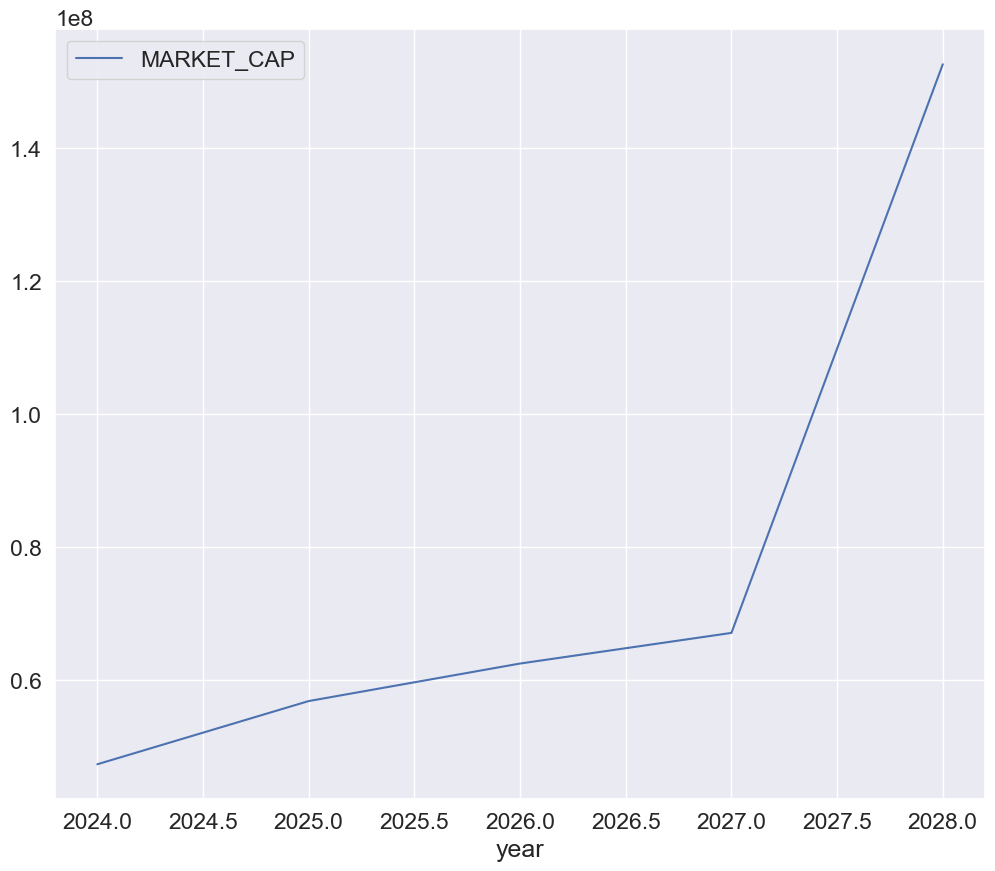

In [51]:
sns.set(font_scale=1.5)
FUTURE.plot(x='year', y='MARKET_CAP')

plt.xlabel=FUTURE['year']

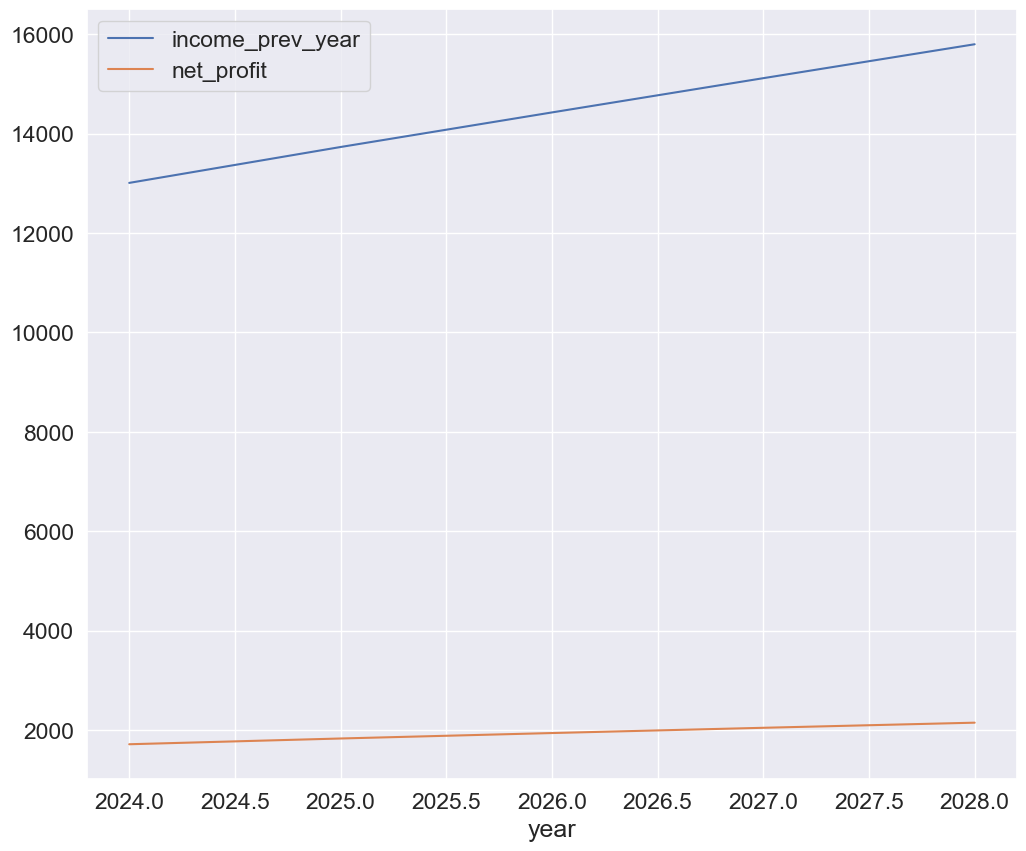

In [52]:
FUTURE.plot(x='year', y=['income_prev_year', 'net_profit'])
plt.xlabel=FUTURE['year']

In [53]:
FUTURE

,NO. OF SHARES,year,AVERAGE SHARE PRICE,NO. OF TRADES,income_prev_year,inflation_prev_year,pcg_prev_year,gdp_growth_prev_year,net_profit,MARKET_CAP
0,21057.081091,2024,2248.150296,2248.150296,13010.182065,5.14,2691.20,6.06,1713.903022,4.733948e+07
1,22488.631652,2025,2527.432657,2527.432657,13732.412775,4.36,2911.24,6.81,1829.726803,5.683850e+07
2,23286.435704,2026,2683.076898,2683.076898,14428.292920,4.13,3146.80,6.78,1939.449665,6.247930e+07
3,23913.153623,2027,2805.343805,2805.343805,15117.483943,3.99,3394.88,6.53,2045.123819,6.708462e+07
4,24494.640171,2028,6228.521215,2918.786488,15800.189525,4.00,3651.67,6.17,2148.115271,1.525654e+08
